In [47]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
import os
import xarray as xr
import numpy as np
from natsort import natsorted
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [49]:
import sys
original_path = os.getcwd()  
os.chdir(original_path)
function_path = './functions/'
sys.path.append(function_path)
from smoothing_function import *
from model_analysis_function import *
from analysis_function import *
from Plot_function import *

# from obs_function import *

## Constrain global temperature
### Load global data

In [50]:
path = '/Users/tongli1997/Library/CloudStorage/OneDrive-UniversityofVictoria/Codes_run_on_local/Global_regional_attribution/Augest_Sep_2025/saved_data/'

file_name = '0.CRUT5&HadCRUT5.Tas.anomalies.AR6.continental.LSAT.GSAT.1850-2024.nc'
obs_all= xr.open_dataarray(path + file_name) 

obs_gsat = obs_all.sel(region = 'GSAT')
obs_lsat_only = obs_all.sel(region = 'LSAT')

file_name = '0.Smoothed.His-ALL-nat-ant-ghg-oa.nan-masked.Tas.anomalies.AR6.continental.LSAT.GSAT.1850-2025.nc'
mod_all = xr.open_dataarray(path + file_name) 


mod_gsat = mod_all.sel(region = 'GSAT').sel(forcing = 'ALL').mean('model_name')
mod_lsat_only = mod_all.sel(region = 'LSAT').sel(forcing = 'ALL').mean('model_name')


In [52]:
path = './saved_data/'

def load_xr_pickle(filename):
    with open(filename, "rb") as f:
        return pickle.load(f)

obs_all_new = load_xr_pickle(path + '0.1.HadCRUT5.Tas.anomalies.46AR6regions_7cont_1glob_175years_1850-2024.pkl')
obs_lsat = obs_all_new.where(obs_all_new.abbrevs == 'LSAT', drop=True)

mod_all_his_fu = load_xr_pickle(path + '0.4.Smoothed_His-Fu-ALL.25mods.mean.nonmasked.Tas.anomalies.46AR6regions_7cont_1glob_251years_1850-2100.pkl')

mod_lsat = mod_all_his_fu.where(obs_all_new.abbrevs == 'LSAT', drop=True).squeeze().mean('model_name').sel(year = slice(1850, 2025))

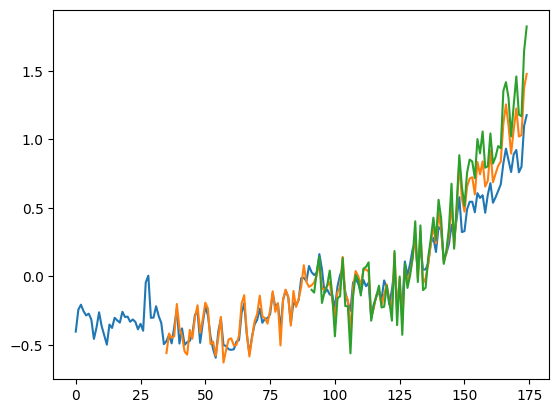

In [53]:
plt.plot(obs_gsat)
plt.plot(obs_lsat)
plt.plot(obs_lsat_only)
plt.show()

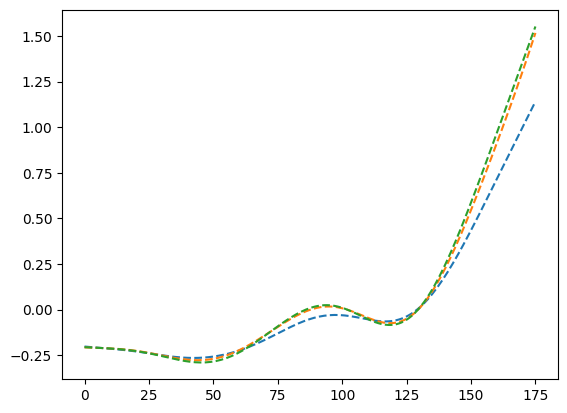

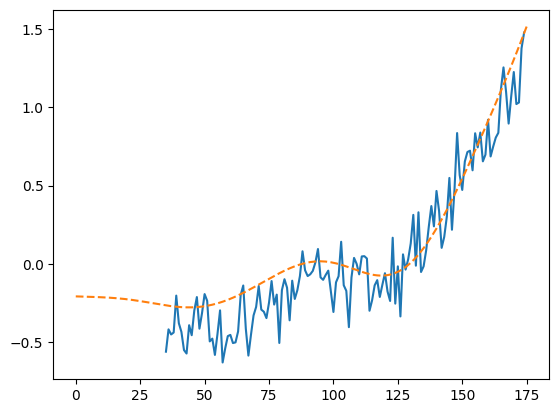

In [54]:
# plt.plot(obs_gsat)
# plt.plot(obs_lsat)
# plt.plot(obs_lsat_only)

plt.plot(mod_gsat, ls = '--')
plt.plot(mod_lsat, ls = '--')
plt.plot(mod_lsat_only, ls = '--')

plt.show()

plt.plot(obs_lsat)
plt.plot(mod_lsat, ls = '--')
plt.show()
